In [2]:
import pandas as pd
import numpy as np

# Series类型

**由Python列表创建Series类型**

In [16]:
a = pd.Series([9,8,7,6])
a

0    9
1    8
2    7
3    6
dtype: int64

In [17]:
b = pd.Series([9,8,7,6],["a","b","c","d"])
b

a    9
b    8
c    7
d    6
dtype: int64

In [18]:
b = pd.Series([9,8,7,6],index = ["a","b","c","d"])
b

a    9
b    8
c    7
d    6
dtype: int64

**从标量值创建Series类型**

In [23]:
b = pd.Series(25,index = ["a","b","c","d"],dtype=np.int32)
b

a    25
b    25
c    25
d    25
dtype: int32

**从字典创建Series类型**

In [24]:
a = pd.Series({"a":9,"b":8,"c":7},index=["a","d","b"])
a

a    9.0
d    NaN
b    8.0
dtype: float64

**从ndarray类型创建**

In [33]:
a = pd.Series(np.arange(5),index = ["a","b","c","d","e"])
a

a    0
b    1
c    2
d    3
e    4
dtype: int32

**Series类型基本操作**

In [34]:
a.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [28]:
a.values

array([0, 1, 2, 3, 4])

In [36]:
a["b"]

1

In [37]:
a[-1]

4

In [42]:
a[["a","b","e"]]

a    0
b    1
e    4
dtype: int32

In [44]:
a[:3]

a    0
b    1
c    2
dtype: int32

In [46]:
a[a>a.median()]

d    3
e    4
dtype: int32

In [47]:
np.exp(a)

a     1.000000
b     2.718282
c     7.389056
d    20.085537
e    54.598150
dtype: float64

In [50]:
a.get("b",100)

1

In [51]:
a.get("f",100)

100

**Series类型数据对齐**

In [52]:
a = pd.Series([1,2,3],["c","d","e"])
b = pd.Series([9,8,7,6],["a","b","c","d"])
a+b

a    NaN
b    NaN
c    8.0
d    8.0
e    NaN
dtype: float64

# DataFrame类型  
**从二维ndarray对象创建DataFrame**

In [53]:
pd.DataFrame(np.arange(10).reshape(2,5))

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9


**从一维ndarray对象字典创建**

In [57]:
dt = { "one": np.arange(4),"two":pd.Series([9,8,7,6],index = ["a","b","c","d"])}
pd.DataFrame(dt)

,one,two
a,0,9
b,1,8
c,2,7
d,3,6


**从列表类型字典创建**

In [15]:
dt = {"one": [1,2,3,4],"two":[9,8,7,6]}
df = pd.DataFrame(dt,index = ["a","b","c","d"])
df

,one,two
a,1,9
b,2,8
c,3,7
d,4,6


**DataFrame类型的基本操作**

In [7]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [8]:
df.columns

Index(['one', 'two'], dtype='object')

In [10]:
df.values

array([[1, 9],
       [2, 8],
       [3, 7],
       [4, 6]], dtype=int64)

**类似字典的操作**

In [16]:
df["three"] = df["one"]*df["two"]
df["flag"] = df["two"]>7
df

,one,two,three,flag
a,1,9,9,True
b,2,8,16,True
c,3,7,21,False
d,4,6,24,False


In [17]:
del df["two"]
df

,one,three,flag
a,1,9,True
b,2,16,True
c,3,21,False
d,4,24,False


In [18]:
df.pop("three")

a     9
b    16
c    21
d    24
Name: three, dtype: int64

In [19]:
df

,one,flag
a,1,True
b,2,True
c,3,False
d,4,False


**类似ndarray类型的操作**  
**算术运算**  
**自动补齐,补齐时缺项填充NaN**

In [20]:
a = pd.DataFrame(np.arange(12).reshape(3,4))
a

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [21]:
b = pd.DataFrame(np.arange(20).reshape(4,5))
b

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [22]:
a+b

,0,1,2,3,4
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [23]:
a*b

,0,1,2,3,4
0,0.0,1.0,4.0,9.0,NaN
1,20.0,30.0,42.0,56.0,NaN
2,80.0,99.0,120.0,143.0,NaN
3,NaN,NaN,NaN,NaN,NaN


**不同维度间为广播运算，一维Series默认在轴1参与运算**

In [26]:
c = pd.Series(np.arange(4))
c

0    0
1    1
2    2
3    3
dtype: int32

In [27]:
c - 10

0   -10
1    -9
2    -8
3    -7
dtype: int32

In [28]:
b - c

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,NaN
1,5.0,5.0,5.0,5.0,NaN
2,10.0,10.0,10.0,10.0,NaN
3,15.0,15.0,15.0,15.0,NaN


**方法形式的算术运算**  
**fill_value替代NaN后参与运算**

In [31]:
b.add(a,fill_value=100)

,0,1,2,3,4
0,0.0,2.0,4.0,6.0,104.0
1,9.0,11.0,13.0,15.0,109.0
2,18.0,20.0,22.0,24.0,114.0
3,115.0,116.0,117.0,118.0,119.0


In [32]:
b.mul(a,fill_value=0)

,0,1,2,3,4
0,0.0,1.0,4.0,9.0,0.0
1,20.0,30.0,42.0,56.0,0.0
2,80.0,99.0,120.0,143.0,0.0
3,0.0,0.0,0.0,0.0,0.0


In [33]:
b.sub(c,axis = 1)

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,NaN
1,5.0,5.0,5.0,5.0,NaN
2,10.0,10.0,10.0,10.0,NaN
3,15.0,15.0,15.0,15.0,NaN


In [34]:
b.sub(c,axis = 0)

,0,1,2,3,4
0,0,1,2,3,4
1,4,5,6,7,8
2,8,9,10,11,12
3,12,13,14,15,16


**比较运算**  
**只能比较索引尺寸相同的数据**

In [24]:
a = pd.DataFrame(np.arange(12).reshape(3,4))
b = pd.DataFrame(np.arange(12,0,-1).reshape(3,4))
a>b

,0,1,2,3
0,False,False,False,False
1,False,False,False,True
2,True,True,True,True


**广播运算默认在1轴进行运算**

In [39]:
a > c

,0,1,2,3
0,False,False,False,False
1,True,True,True,True
2,True,True,True,True


**转置**

In [25]:
a.T

,0,1,2
0,0,4,8
1,1,5,9
2,2,6,10
3,3,7,11


# Pandas数据读写

In [3]:
import pandas as pd
data = pd.read_excel("demo.xlsx")
data

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

# Pandas数据索引  
**将列设置为INDEX索引**

In [5]:
data1 = data.set_index("user_id")
data1

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [6]:
data1.index

Int64Index([1001, 1000, 1002, 1003], dtype='int64', name='user_id')

**重新索引**

In [7]:
data1 = data1.reindex(index = [1002,1003,1000,1001])
data1

,name,age,country,score,continent
user_id,,,,,
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe
1000,John,33,USA,6.7,America
1001,Mark,55,Italy,4.5,Europe


In [8]:
data1 = data1.reindex(columns = ["country", "continent","name", "age", "score"])
data1

,country,continent,name,age,score
user_id,,,,,
1002,USA,America,Tim,41,3.9
1003,Germany,Europe,Jenny,12,9.0
1000,USA,America,John,33,6.7
1001,Italy,Europe,Mark,55,4.5


In [9]:
newc = data1.columns.insert(5,"新增")
data1.reindex(columns = newc,fill_value = 0)

,country,continent,name,age,score,新增
user_id,,,,,,
1002,USA,America,Tim,41,3.9,0
1003,Germany,Europe,Jenny,12,9.0,0
1000,USA,America,John,33,6.7,0
1001,Italy,Europe,Mark,55,4.5,0


**删除索引**

In [14]:
data1.drop(1003)

,country,continent,name,age,score
user_id,,,,,
1002,USA,America,Tim,41,3.9
1000,USA,America,John,33,6.7
1001,Italy,Europe,Mark,55,4.5


In [15]:
data1.drop("country",axis =1)

,continent,name,age,score
user_id,,,,
1002,America,Tim,41,3.9
1003,Europe,Jenny,12,9.0
1000,America,John,33,6.7
1001,Europe,Mark,55,4.5


In [18]:
data1.drop(columns=["name","country"],index=[1001,1002])

,continent,age,score
user_id,,,
1003,Europe,12,9.0
1000,America,33,6.7


# 排序

In [19]:
data1.sort_index()

,country,continent,name,age,score
user_id,,,,,
1000,USA,America,John,33,6.7
1001,Italy,Europe,Mark,55,4.5
1002,USA,America,Tim,41,3.9
1003,Germany,Europe,Jenny,12,9.0


**按列排序**

In [20]:
data1.sort_values(["continent","age"])

,country,continent,name,age,score
user_id,,,,,
1000,USA,America,John,33,6.7
1002,USA,America,Tim,41,3.9
1003,Germany,Europe,Jenny,12,9.0
1001,Italy,Europe,Mark,55,4.5


In [23]:
data1.sort_values(by="age",ascending=True)

,country,continent,name,age,score
user_id,,,,,
1003,Germany,Europe,Jenny,12,9.0
1000,USA,America,John,33,6.7
1002,USA,America,Tim,41,3.9
1001,Italy,Europe,Mark,55,4.5


**多重索引排序**

In [21]:
data_multi = data.set_index(["continent","country"])
data_multi = data_multi.sort_index()
data_multi

user_id   name  age  score
continent country                            
America   USA         1000   John   33    6.7
          USA         1002    Tim   41    3.9
Europe    Germany     1003  Jenny   12    9.0
          Italy       1001   Mark   55    4.5

# 选择数据

In [8]:
#行、列均为标量值时返回标量值
data1.loc[1001,"name"]

'Mark'

In [9]:
#使用标量值选择一行或者一列，返回Series
data1.loc[[1001,1002],"name"]

user_id
1001    Mark
1002     Tim
Name: name, dtype: object

In [12]:
#选择多行和多列返回DataFrame
data1.loc[:1002,["country","name"]]

,country,name
user_id,,
1001,Italy,Mark
1000,USA,John
1002,USA,Tim


In [15]:
data1[["country","name"]]

,country,name
user_id,,
1001,Italy,Mark
1000,USA,John
1002,USA,Tim
1003,Germany,Jenny


In [16]:
data1.iloc[1:3,:2]

,name,age
user_id,,
1000,John,33
1002,Tim,41


In [23]:
filter = (data1["age"]>40)&(data1["country"]=="USA") 
filter

user_id
1001    False
1000    False
1002     True
1003    False
dtype: bool

In [25]:
data1.loc[filter,:]

,name,age,country,score,continent
user_id,,,,,
1002,Tim,41,USA,3.9,America


In [26]:
data1.loc[data1.index>1001]

,name,age,country,score,continent
user_id,,,,,
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [29]:
data1.loc[data1["country"].isin( ["Italy","Germany"])]

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1003,Jenny,12,Germany,9.0,Europe


In [30]:
filter = (data1["age"]>40)&(data1["country"]=="USA") 
data1.loc[filter,"name"] = "newName"
data1

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,newName,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


# 修改数据

In [39]:
data.rename(columns={"name":"First Name","age":"Age"})

,user_id,First Name,Age,country,score,continent
id,,,,,,
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [7]:
data.T

,0,1,2,3
user_id,1001,1000,1002,1003
name,Mark,John,Tim,Jenny
age,55,33,41,12
country,Italy,USA,USA,Germany
score,4.5,6.7,3.9,9
continent,Europe,America,America,Europe


In [33]:
data1.replace({"country":{"USA":"U.S."}})

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,U.S.,6.7,America
1002,newName,41,U.S.,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [36]:
data1.loc[:,"discount"]=0
data1.loc[:,"price"]=[49,49,99,99]
data1

,name,age,country,score,continent,discount,price
user_id,,,,,,,
1001,Mark,55,Italy,4.5,Europe,0,49
1000,John,33,USA,6.7,America,0,49
1002,newName,41,USA,3.9,America,0,99
1003,Jenny,12,Germany,9.0,Europe,0,99


In [45]:
data1.insert(2,"gender",["male","male","male","Female"])
data1

,name,age,gender,country,score,continent,discount,price
user_id,,,,,,,,
1001,Mark,55,male,Italy,4.5,Europe,0,49
1000,John,33,male,USA,6.7,America,0,49
1002,newName,41,male,USA,3.9,America,0,99
1003,Jenny,12,Female,Germany,9.0,Europe,0,99


In [7]:
data2 = data1.copy()
data2.loc[:,"birth_year"] = 2021- data2["age"]
data2

,name,age,country,score,continent,birth_year
user_id,,,,,,
1001,Mark,55,Italy,4.5,Europe,1966
1000,John,33,USA,6.7,America,1988
1002,Tim,41,USA,3.9,America,1980
1003,Jenny,12,Germany,9.0,Europe,2009


# 处理空值

In [28]:
df =  pd.read_excel("demo.xlsx","Sheet2")
df

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,NaN
2,1002,Tim,41,NaN,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [29]:
df.dropna()

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
3,1003,Jenny,12,Germany,9.0,Europe


In [30]:
df.loc[4,:]=[None,None,None,None,None,None]

In [5]:
df

,user_id,name,age,country,score,continent
0,1001.0,Mark,55.0,Italy,4.5,Europe
1,1000.0,John,33.0,USA,6.7,NaN
2,1002.0,Tim,41.0,NaN,3.9,America
3,1003.0,Jenny,12.0,Germany,9.0,Europe
4,NaN,None,NaN,None,NaN,None


In [31]:
df.dropna(how="all")

,user_id,name,age,country,score,continent
0,1001.0,Mark,55.0,Italy,4.5,Europe
1,1000.0,John,33.0,USA,6.7,NaN
2,1002.0,Tim,41.0,NaN,3.9,America
3,1003.0,Jenny,12.0,Germany,9.0,Europe


In [8]:
df.isna()

,user_id,name,age,country,score,continent
0,False,False,False,False,False,False
1,False,False,False,False,False,True
2,False,False,False,True,False,False
3,False,False,False,False,False,False
4,True,True,True,True,True,True


In [16]:
df.fillna(0)

,user_id,name,age,country,score,continent
0,1001.0,Mark,55.0,Italy,4.5,Europe
1,1000.0,John,33.0,USA,6.7,0
2,1002.0,Tim,41.0,0,3.9,America
3,1003.0,Jenny,12.0,Germany,9.0,Europe
4,0.0,0,0.0,0,0.0,0


# 多表连接

In [10]:
data1

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [13]:
data2 = pd.DataFrame(data=[[15,"France",4.1,"Becky"],[44,"Canada",6.1,"Leanne"]],
                     columns=["age","country","score","name"],
                    index=[1000,1011])

In [14]:
data2

,age,country,score,name
1000,15,France,4.1,Becky
1011,44,Canada,6.1,Leanne


In [18]:
pd.concat([data1,data2],axis=0,sort=False)

,name,age,country,score,continent
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe
1000,Becky,15,France,4.1,NaN
1011,Leanne,44,Canada,6.1,NaN


In [24]:
data3 = pd.DataFrame(data=[[3,4],[5,6]],columns=["quiz","logins"],index=[1000,2000])
data3

,quiz,logins
1000,3,4
2000,5,6


In [25]:
pd.concat([data1,data3],axis=1)

,name,age,country,score,continent,quiz,logins
1000,John,33.0,USA,6.7,America,3.0,4.0
1001,Mark,55.0,Italy,4.5,Europe,NaN,NaN
1002,Tim,41.0,USA,3.9,America,NaN,NaN
1003,Jenny,12.0,Germany,9.0,Europe,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,5.0,6.0


# Pandas数据统计

In [30]:
data1

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [31]:
data1.groupby("continent").mean()

,age,score
continent,,
America,37.0,5.30
Europe,33.5,6.75


In [32]:
data1.groupby(["continent","country"]).mean()

age  score
continent country            
America   USA       37    5.3
Europe    Germany   12    9.0
          Italy     55    4.5

In [34]:
data1.groupby(["continent"]).agg(lambda x:x.max()-x.min())


,age,score
continent,,
America,8,2.8
Europe,43,4.5


# Pandas绘图

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


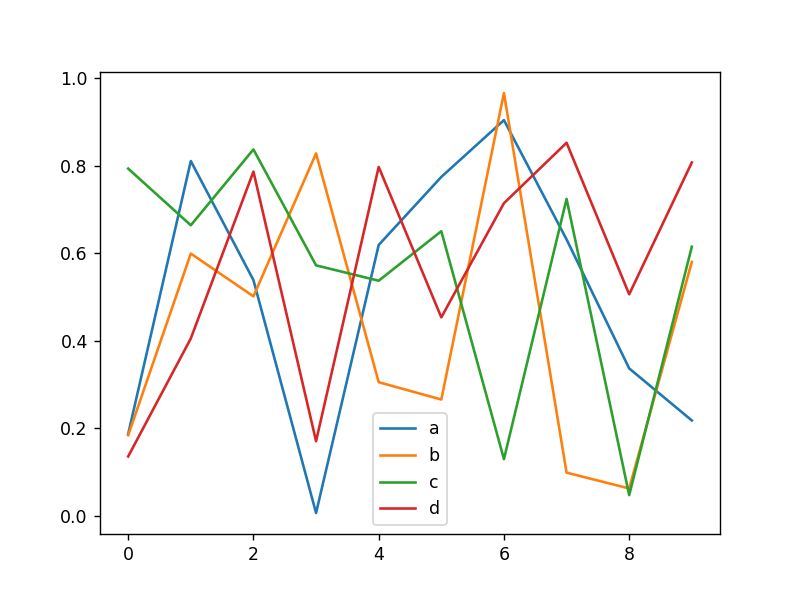

<AxesSubplot:>

In [4]:
import pandas as pd
df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])

df.plot()
# 使用bar()生成直方图，barh()生成水平条形图（要生成一个堆积条形图，通过指定：pass stacked=True）
#df.plot.bar()# 图1
#df.plot.bar(stacked=True)# 图2
#df.plot.barh(stacked=True)# 图3
#plt.show()

<IPython.core.display.Javascript object>


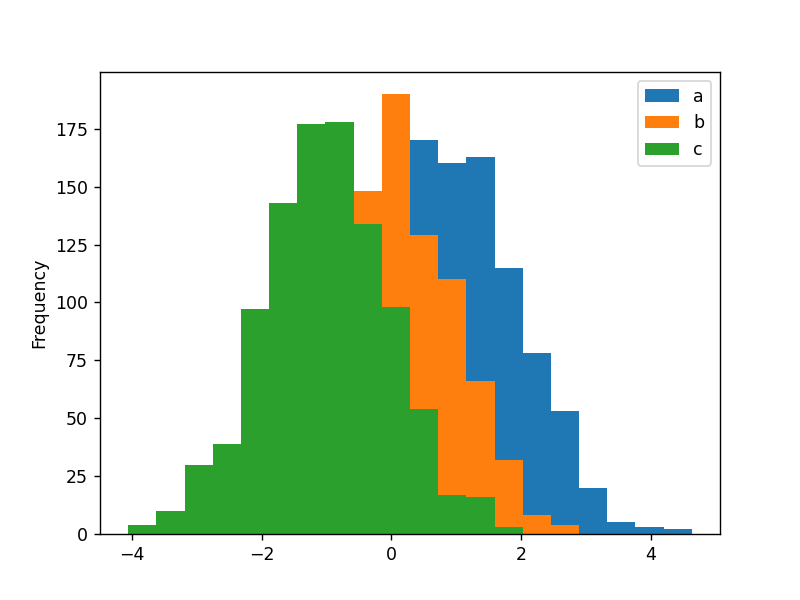

In [5]:
df = pd.DataFrame({'a':np.random.randn(1000)+1,'b':np.random.randn(1000),'c':
np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

df.plot.hist(bins=20)# 图1
# 要为每列绘制不同的直方图，使用以下代码
#df.hist(bins=20)# 图2（3个小图）
plt.show()

<IPython.core.display.Javascript object>


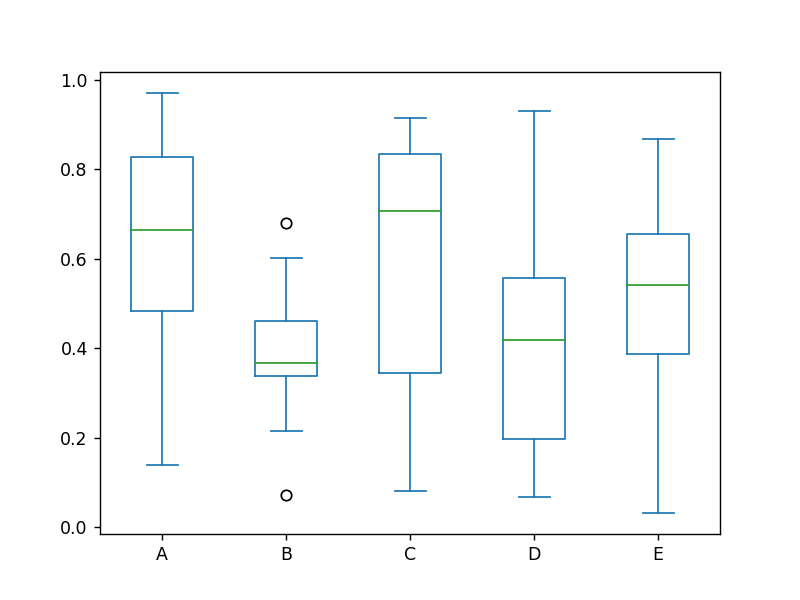

In [6]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()
plt.show()

<IPython.core.display.Javascript object>


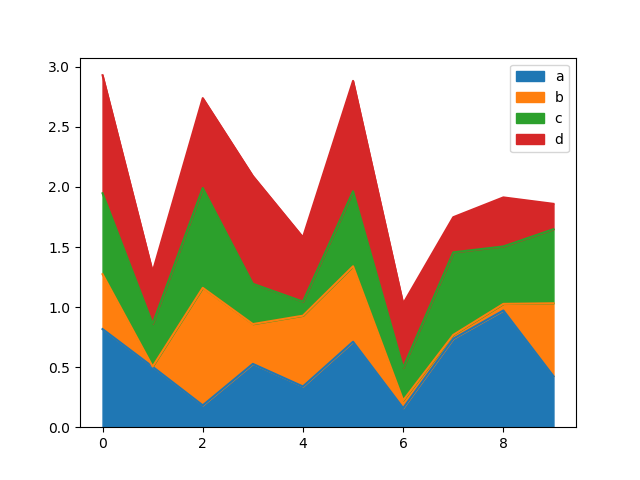

In [18]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area()
plt.show()

<IPython.core.display.Javascript object>


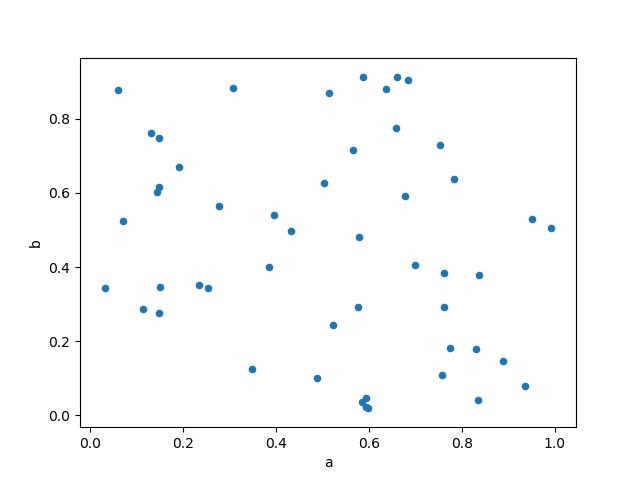

In [19]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b')
plt.show()

<IPython.core.display.Javascript object>


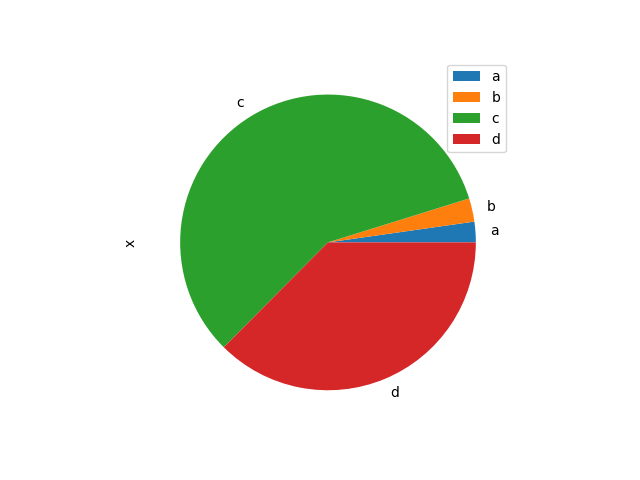

In [20]:
df = pd.DataFrame(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], columns=['x'])
df.plot.pie(subplots=True)
plt.show()